# Solución Taller Capítulo 3

## Problema 1

Dada una lista de números enteros (tanto positivos, como negativos), encuentre todos los elementos de la lista que realizan una partición de esta en dos grupos de igual suma. Se pide retornar el índice de los números que cumplen la condición. Por ejemplo, si la lista fuese [3,4,2,1] la respuesta debiese ser [1], dado que el el número 4 divide a la lista en [3] y [2,1] que suman lo mismo.

#### Código:

```python
def division_lista(lista):
    # Solucion del problema
        
lista = [0,-4,6,-4,-3,3,2,0]
indices = division_lista(lista)
print(indices)
```

#### Salida:


    [0,3,7]

**(a)** Resuelva el problema utilizando completamente fuerza bruta, es decir, analice todos los casos para entregar su respuesta y no use ninguna lógica que le ahorre tiempo de resolución. ¿De qué orden es la solución construida?

In [11]:
# Parte A
def division_lista_a(lista):
    res = []
    n = len(lista)
    for i in range(n):
        if sum(lista[0:i]) == sum(lista[i+1:n]):
            res.append(i)
    return res

In [12]:
lista = [0,-4,6,-4,-3,3,2,0]
indices = division_lista_a(lista)
print(indices)

[0, 3, 7]


   **R:** Solución de orden $O(n^2)$

**(b)** Resuelva el mismo problema pero ahora debe reducir el orden de solución. Es decir, trate de optimizar el tiempo de solución de la parte (a). ¿De qué orden es la solución construida?

In [13]:
# Parte B
def division_lista_b(lista):
    res = []
    n = len(lista)

    left = []
    left.append(0)
    for i in range(1,n):
        left.append(left[i - 1] + lista[i - 1])

    right = 0
    for i in reversed(range(n)):
        if(left[i] == right):
            res.append(i)
        
        right += lista[i]
        
    return res

In [14]:
lista = [0,-4,6,-4,-3,3,2,0]
indices = division_lista_b(lista)
print(indices)

[7, 3, 0]


   **R:** Solución de orden $O(n)$

**(c)** Construya dos gráficos *tamaño de input vs tiempo de ejecución* para las soluciones de las parte (a) y (b). ¿Qué observa?

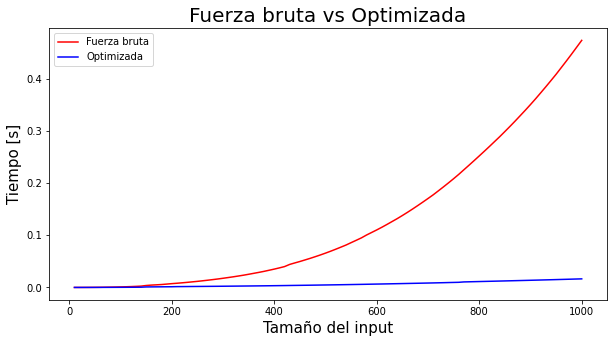

In [15]:
import time, random, math
import matplotlib.pyplot as plt

#Funcion para crear inputs
def inputs(size):
    l = [int(random.uniform(-min((10000,size))+1,min((10000,size))+1)) for _ in range(size)]
    return l


sizes = [10*x for x in range(1,101)]
times_a = []
times_b = []

total_time_a = 0
total_time_b = 0
runs_per_size = 1
for size in sizes:
    for _ in range(runs_per_size):
        
        #Creamos un input
        lista = inputs(size)
        
        #Ejecutamos el A
        start = time.time()
        division_lista_a(lista)
        end = time.time()
        total_time_a += end-start 
        
        #Ejecutamos el B
        start = time.time()
        division_lista_b(lista)
        end = time.time()
        total_time_b += end-start 
        
    times_a.append(total_time_a/runs_per_size)
    times_b.append(total_time_b/runs_per_size)

plt.figure(figsize=(10,5))
plt.plot(sizes, times_a, 'r', label = 'Fuerza bruta')  
plt.plot(sizes, times_b, 'b', label = 'Optimizada')
plt.title('Fuerza bruta vs Optimizada', size = 20)
plt.xlabel('Tamaño del input', size = 15)
plt.ylabel('Tiempo [s]', size = 15)
plt.legend()
plt.show()

## Problema 2

Escriba un programa que cuente las formas en que se puede obtener un número objetivo entero mayor que cero a partir de elementos pertenecientes a una lista de números (sin repetirlos). Para ello, solo puede utilizar números de adición (+) o substracción (-). Por ejemplo, la cantidad de veces que se puede formar el número 6 con la lista [5, 3, -6, 2] es 4. Estas serían:

- -(-6) = 6
- +(5)+(3)-(2) = 6
- +(5)-(3)-(-6)-(2) = 6
- -(5)+(3)-(-6)+(2) = 6

#### Código:

```python
def numeros(lista, objetivo):
    # Solucion del problema

lista = [8, -2, 1, -3, 5]
objetivo = 5;
conteo = numeros(lista, objetivo)
print(conteo)
```

#### Salida:


    7

In [16]:
def conteo(arr, n, target):
 
    includeMinus = 0
    includePlus = 0
    
    if target == 0:
        return 1
        
    if n < 0:
        return 0
        
    exclude = conteo(arr, n - 1, target)
    includeMinus  = conteo(arr, n - 1, target - arr[n])
    includePlus  = conteo(arr, n - 1, target + arr[n])
    
    return exclude + includePlus + includeMinus
 
def numeros(arr, target):
    if target <= 0:
        return False
    else:
        return conteo(arr, len(arr)-1, target)

In [10]:
lista = [8, -2, 1, -3, 5]
objetivo = 5;
conteo = numeros(lista, objetivo)
print(conteo)

7
